# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The stakeholders are the company management team and the HR department of Salifort Motors - a company that is engaged in leading-edge research into alternative energy vehicles.

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees. They have the following question: what is likely to make the employee leave the company?

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### The HR dataset 

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.utils import resample

# Import requirements for GridSearch, Random Forest and XGBoost
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve

from xgboost import XGBClassifier
from xgboost import plot_importance


### Load the dataset

In [2]:
# Display all columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration 

### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Based on this information, there is no missing data.

### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


There are no obvious anomalies in the distribution of the data.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns.values


array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype=object)

In [7]:
# Rename columns as needed
df0 = df0.rename(columns={'Department':'department', 
                          'Work_accident':'work_accident',
                         'time_spend_company':'tenure',
                          'average_montly_hours': 'average_monthly_hours',
                          'last_evaluation': 'performance_rating',
                         'number_project':'project_number',
                          'left':'left_company',
                         'promotion_last_5years':'recent_promotion'})

# Display all column names after the update
df0.columns.values


array(['satisfaction_level', 'performance_rating', 'project_number',
       'average_monthly_hours', 'tenure', 'work_accident', 'left_company',
       'recent_promotion', 'department', 'salary'], dtype=object)

### Check missing values

The info table has already confirmed there is no missing data.


### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().value_counts()


False    11991
True      3008
Name: count, dtype: int64

In [9]:
# Inspect some rows containing duplicates as needed
duplicated_rows= df0[df0.duplicated()].sort_values(['department', 'satisfaction_level'])
print(duplicated_rows.head(5))

       satisfaction_level  performance_rating  project_number  \
12140                0.09                0.96               6   
12445                0.09                0.94               6   
12528                0.09                0.80               6   
12595                0.09                0.87               5   
14351                0.09                0.96               6   

       average_monthly_hours  tenure  work_accident  left_company  \
12140                    245       4              0             1   
12445                    283       5              0             1   
12528                    301       5              0             1   
12595                    263       4              0             1   
14351                    245       4              0             1   

       recent_promotion department  salary  
12140                 0         IT     low  
12445                 0         IT     low  
12528                 0         IT  medium  
12595         

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0.drop_duplicates(keep='first', inplace=True)

# Display first few rows of new dataframe as needed
df0.head(5)


,satisfaction_level,performance_rating,project_number,average_monthly_hours,tenure,work_accident,left_company,recent_promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
# confirm deletion and view new size of the dataset
df0.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

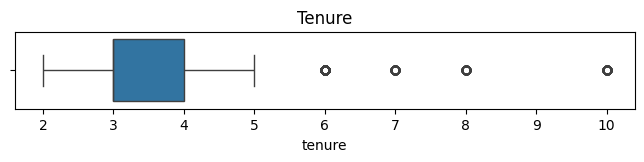

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8,1))
g = sns.boxplot(data=df0, 
            x='tenure', 
            );
g.set_title('Tenure');


In [13]:
# Determine the number of rows containing outliers
upper_limit = df0['tenure'].quantile(0.75) + 1.5 *(df0['tenure'].quantile(0.75) -
                                                  df0['tenure'].quantile(0.25))
print('With an upper limit of', upper_limit, ' outliers number ', df0.loc[df0['tenure'] > upper_limit]['tenure'].count())


With an upper limit of 5.5  outliers number  824


# pAce: Analyze Stage

## Step 2. Data Exploration 

In [14]:
# Get numbers of people who left vs. stayed
print("Number stayed(0) vs left(1): \n", df0['left_company'].value_counts())

# Get percentages of people who left vs. stayed
print("\nPercentage stayed(0) vs left(1):\n", (df0['left_company'].value_counts(normalize=True)*100.0).round(2))


Number stayed(0) vs left(1): 
 left_company
0    10000
1     1991
Name: count, dtype: int64

Percentage stayed(0) vs left(1):
 left_company
0    83.4
1    16.6
Name: proportion, dtype: float64


### Data visualizations

In [17]:
# Create a copy of the dataframe to use later on
df = df0.copy()

In [18]:
# add some categories to simplify plotting
df0['left_company_label'] = df0['left_company'].replace({0: 'Stayed', 1: 'Left'})
df0['performance_category'] = pd.cut(df0['performance_rating'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df0['satisfaction_category'] = pd.cut(df0['satisfaction_level'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df0['hours_worked_category'] = pd.cut(df0['average_monthly_hours'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


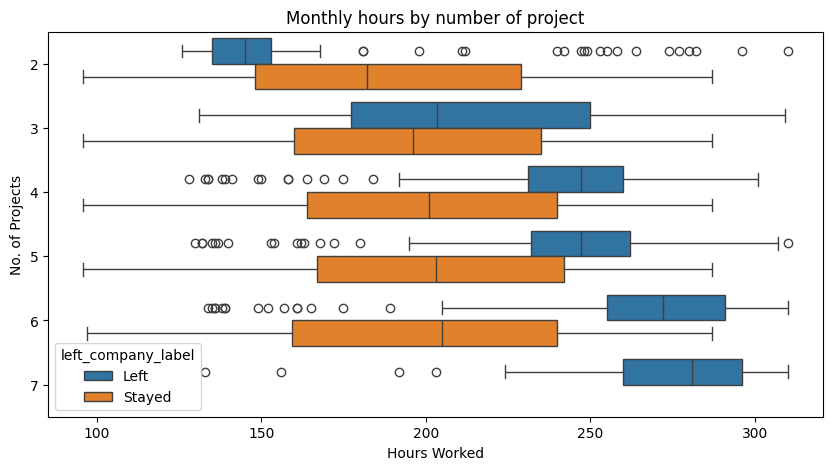

In [19]:
# Monthly hours by number of projects
# Create a boxplot showing 'average_monthly_hours' distributed for 'project_number'
plt.figure(figsize=(10,5))
g=sns.boxplot(data=df0, x='average_monthly_hours', 
            y='project_number', 
            hue='left_company_label',
            orient='h')
plt.xlabel('Hours Worked')
plt.ylabel('No. of Projects')
plt.title('Monthly hours by number of project', fontsize='12')
plt.show()


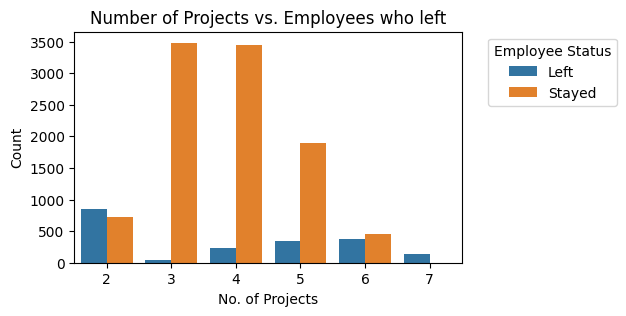

In [20]:
# Plot of 'average_monthly_hours' against employees who left
plt.figure(figsize=(5,3))
sns.countplot(x='project_number', hue='left_company_label', data=df0)
plt.title('Number of Projects vs. Employees who left')
plt.xlabel('No. of Projects')
plt.ylabel('Count')
plt.legend(title='Employee Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Analysis:

These two plots show two extremes:
- Staff with only two projects and who worked less than 150 hours a month left.
- Nearly half the staff with 6 projects and who worked long hours left. All the staff with 7 projects left. 

### Insight:
Management needs to further analyze the following:
- Why are some staff members being given such a small number of projects? Do they not have the required skills? Is the company employing staff with the correct profile? Of those with 2 projects, 54% left, which is a high attrition.
- Why are others being given so many projects and are working such long hours? Again, is there a shortage of certain types of skills? These staff are working nearly twice as many hours a month as those with only two projects.
- Does the problem lie with management not adequately utilizing staff, and not adequately allocating projects?
- There is no data about who left voluntarily and who was asked to leave, and why.

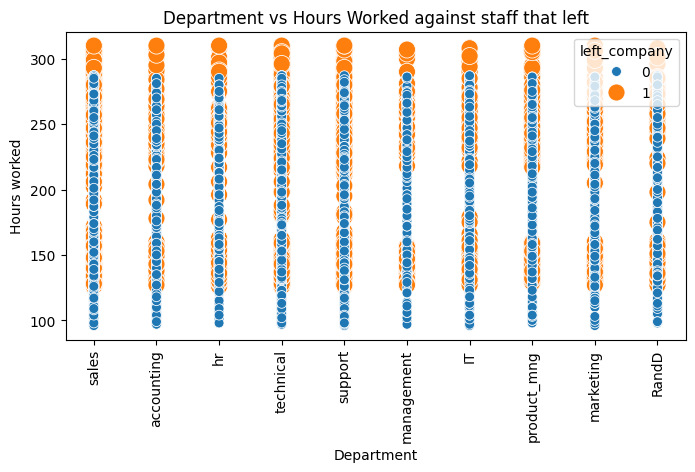

In [21]:
# Create the scatter plot of 'department' vs 'left_company'
plt.figure(figsize=(8, 4))

# Scatter plot with 'department' on x-axis, 'left_company' on y-axis, and 'hours_worked' as the size of points
sns.scatterplot(
    x='department', 
    y='average_monthly_hours', 
    size='left_company', 
    sizes=(150, 50),  # Adjust the size range
    hue='left_company',  # Use color to represent hours worked
    data=df0,
    legend='brief'
)

# Add labels and title
plt.title('Department vs Hours Worked against staff that left')
plt.xticks(rotation = 90)
plt.xlabel('Department')
plt.ylabel('Hours worked')

# Show plot
plt.show()

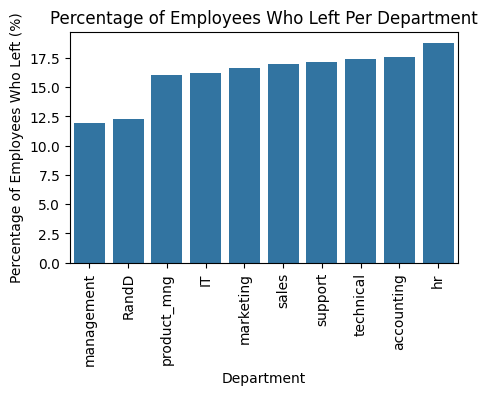

In [22]:
# Percentage of employees who left per department
# Group by department and calculate total employees and employees who left
dept_counts = df0.groupby('department').agg(total_employees=('left_company', 'count'),
                                           employees_left=('left_company', 'sum')).reset_index()

# Calculate the percentage of employees who left per department
dept_counts['percent_left'] = (dept_counts['employees_left'] / dept_counts['total_employees']
                               ) * 100
dept_counts = dept_counts.sort_values(by=['percent_left'], axis = 0)

# Step 3: Create a bar plot to show the percentage of employees who left per department
plt.figure(figsize=(5,3))
sns.barplot(x='department', y='percent_left', data=dept_counts)

# Step 4: Add labels and title

plt.title('Percentage of Employees Who Left Per Department')
plt.xlabel('Department')
plt.ylabel('Percentage of Employees Who Left (%)')

# Display the plot
plt.xticks(rotation = 90) # Rotate x-axis labels 
plt.show()

### Analysis:

- There is nothing highly significant in the distribution of staff who leave per department.
- However, in each department, the staff who are overworked end up leaving.

### Insights:

Being overworked in this company is a definite factor that contributes to staff leaving.

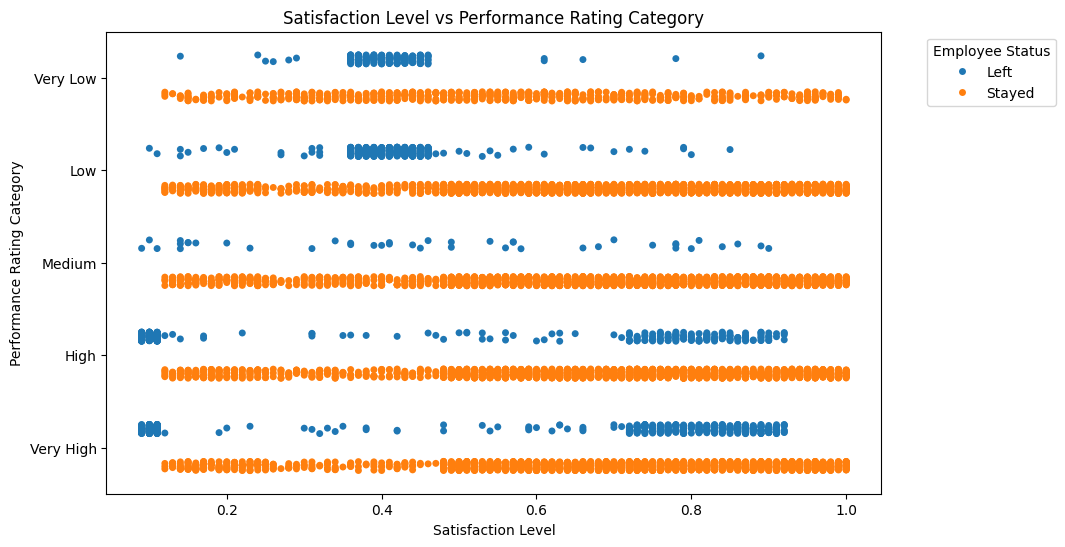

In [25]:
# Strip plot of satisfaction level vs performance rating categories
plt.figure(figsize=(10, 6))
sns.stripplot(x='satisfaction_level', y='performance_category', hue='left_company_label', data=df0, dodge=True)

plt.title('Satisfaction Level vs Performance Rating Category')
plt.xlabel('Satisfaction Level')
plt.ylabel('Performance Rating Category')
plt.legend(title='Employee Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

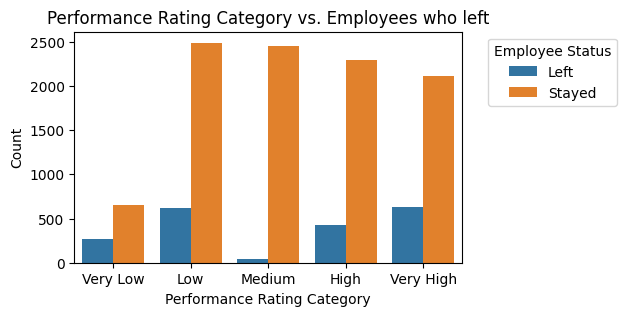

In [26]:
# Plot of performance rating against employees who left
plt.figure(figsize=(5,3))
sns.countplot(x='performance_category', hue='left_company_label', data=df0)
plt.title('Performance Rating Category vs. Employees who left')
plt.xlabel('Performance Rating Category')
plt.ylabel('Count')
plt.legend(title='Employee Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

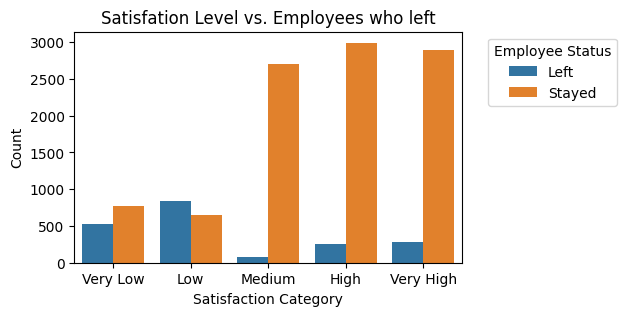

In [27]:
# Satisfaction level vs employees who left
plt.figure(figsize=(5,3))
sns.countplot(x='satisfaction_category', hue='left_company_label', data=df0)
plt.title('Satisfation Level vs. Employees who left')
plt.xlabel('Satisfaction Category')
plt.ylabel('Count')
plt.legend(title='Employee Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


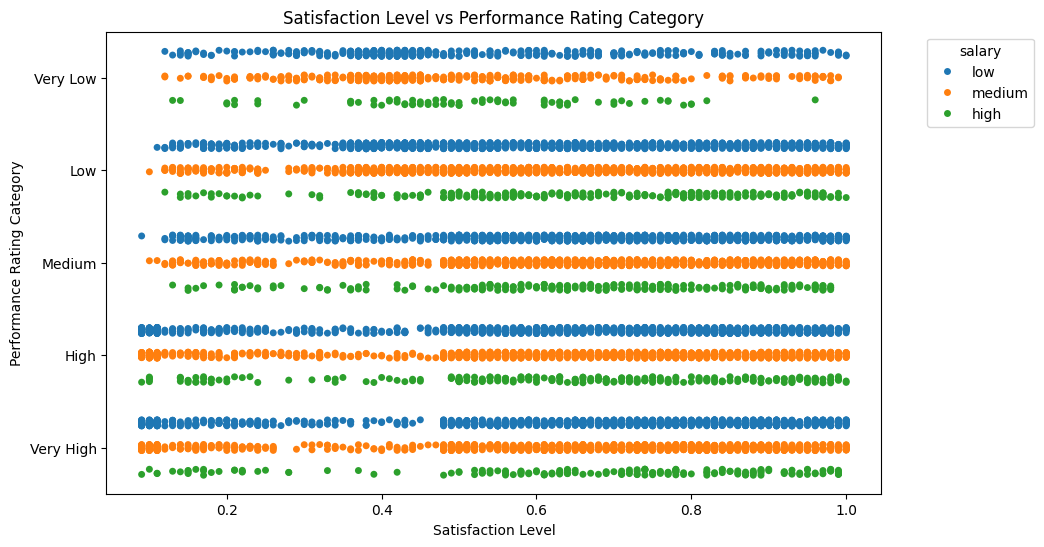

In [32]:
# Strip plot of satisfaction level vs performance rating categories and salary levels
plt.figure(figsize=(10, 6))
sns.stripplot(x='satisfaction_level', y='performance_category', hue='salary', data=df0, dodge=True)

plt.title('Satisfaction Level vs Performance Rating Category')
plt.xlabel('Satisfaction Level')
plt.ylabel('Performance Rating Category')
plt.legend(title='salary', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Analysis:

- It is strange that staff who receive a high and very high performance rating, and who have a high satisfaction level, would leave. There are 1067 such employees.
- It is equally strange that employees with high and very high performance ratings have low satisfaction levels. There are 882 such employees.
- Salary level has made little difference to satisfaction level or performance rating.

### Insights:

Management needs to further analyze the following:
- What factors are causing people who receive excellent performance ratings to leave? This could suggest that they have not been adequately rewarded for their efforts. For example, they may have received a performance bonus that is not in line with company profit levels. 
- There is a problem when people who are so highly dissatisfied receive a high performance rating. There is a possibility that there is a problem in the data that has been recorded. The lowest satifaction level is 0.09. This needs to be verified. 

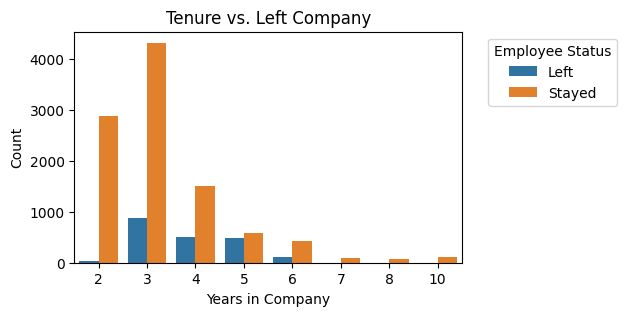

In [28]:
# Years spent in the company vs attrition
plt.figure(figsize=(5,3))
sns.countplot(x='tenure', hue='left_company_label', data=df0)
plt.title('Tenure vs. Left Company')
plt.xlabel('Years in Company')
plt.ylabel('Count')
plt.legend(title='Employee Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


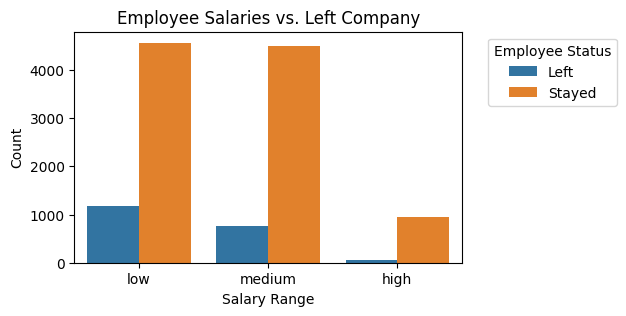

In [29]:
# People who left vs salary range
plt.figure(figsize=(5,3))
sns.countplot(x='salary', hue='left_company_label', data=df0)
plt.title('Employee Salaries vs. Left Company')
plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.legend(title='Employee Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
# What is the extent of the promotions over the past five years?
print("Promotions during the past five years: \n", (df0['recent_promotion'].value_counts(normalize=True)*100.0).round(2))

Promotions during the past five years: 
 recent_promotion
0    98.31
1     1.69
Name: proportion, dtype: float64


### Analysis:

- Most staff leave after working for the company for 3 - 5 years.
- A significant number have a low or medium salary.
- A very small portion of the staff have been promoted over the past five years.

### Insights:

- This company is involved in developing alternate energy vehicles. Are staff being head-hunted after working there for 3 years? No information has been provided in this regard, making it hard to access.

# paCe: Construct Stage

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





#### Observations: 

- The outcome variable - 'left_company' is categorical.
- The observations are independant of each other - this relates to how the data was collected and each dataset relates to a particular employee. Furthermore, duplicates have been removed from the dataset. 
- There is no significant multicollinearity among X variables, as per the heat map.
- One could state that there are outliers in the number of years the employee stayed in the company. However, this is important data in possibly identifying factors that keep the person in the company.
- There is no linear relationship in satisfaction_level and performance_rating, as can be seen in the above graphs. This could impact the performance of a logistic regression model.
- The sample size is adequately. However, this is not a balanced dataset as 16.6% left the company.

### **1. Build a logistical regression model with the unbalanced dataset**

In [33]:
# Encode the categorical variables, these being department and salary
df_dummies = pd.get_dummies(df, columns=['department', 'salary'], dtype=int)
df_dummies.head()

,satisfaction_level,performance_rating,project_number,average_monthly_hours,tenure,work_accident,left_company,recent_promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [34]:
# scale average_monthly_hours
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()
df_scaled = df_dummies.copy()
df_scaled['average_monthly_hours'] = scaler.fit_transform(df_dummies[['average_monthly_hours']]).round(2)
df_scaled.head()

,satisfaction_level,performance_rating,project_number,average_monthly_hours,tenure,work_accident,left_company,recent_promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,0.29,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,0.78,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,0.82,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,0.59,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,0.29,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Before building the model, define helper functions

In [35]:
# Create a helper function to visualize the model results in a confusion matrix
def plt_confusion_matrix(model_name, y_test, y_pred, model):
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # Define custom labels for 0 and 1
    labels = ['Stayed', 'Left']
    
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
    disp.plot()
    
    # set the title
    plt.title("Confusion Plot for the " + model_name)
    plt.show()

In [36]:
# Create a helper function to print metrics and return results in a dataframe
def result_metrics(model_name, y_test, y_pred):
    
    accuracy = accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # create a table of results
    table = pd.DataFrame({'Model': model_name,
                        'F1':  [f1],
                        'Recall': [recall],
                        'Precision': [precision],
                        'Accuracy': [accuracy]
                      }
                        )
    return table

In [37]:
# Create a helper function for a ROC curve and AUC score
def show_RocCurve(model_name, y_test, y_pred):
    RocCurveDisplay.from_predictions(y_test, y_pred)
    plt.title("ROC curve for the " + model_name)
    plt.show()
    # Plot an AUC curve
    print("AUC score: ", metrics.roc_auc_score(y_test, y_pred))


In [38]:
# Create a helper function to relabel columns for presentation purposes
def reset_labels(X):
    X = X.rename(columns={
        'satisfaction_level': 'Satisfaction Level',
        'tenure' : 'Tenure',
        'project_number': 'Projects',
        'performance_rating' : 'Performance Rating',
        'average_monthly_hours' : 'Average Monthly Hours',
        'work_accident' : 'Accidents at work',
        'salary_low' : 'Low Salary',
        'salary_medium' : 'Medium Salary',
        'salary_high' : 'High Salary',
        'department_IT' : 'IT Department',
        'department RandD' : 'Research and Development',
        'department_accounting': 'Accounting Department',
        'department_hr': 'HR Department',
        'department_management': 'Management',
        'department_marketing': 'Marketing Department',
        'department_product_mng': 'Product Management',
        'department_sales': 'Sales Department',
        'department_technical' : 'Technical Department',
        'department_support' : 'Support Department',
        'recent_promotion' : 'Promotion over the last 5 years',
    })

    return X


In [39]:
# Create a helper function to show feature importances
def show_feature_importance(model_name, model, X):
    # note that importances = model.feature_importances_ for a decision tree
    # and importances = model.best_estimator_.feature_importances_ for random forest
    # and XGBoost

    importances = model.best_estimator_.feature_importances_

    # Reset labels for improved presentation
    X = reset_labels(X)
    
    forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)[:15]
    plt.figure(figsize=(10, 8))
    fig, ax = plt.subplots()
    forest_importances.plot(kind='barh');
    
    # Set the title after creating the plot
    ax.set_title("Feature importances for the " + model_name, fontsize=12)
    plt.xlabel("Feature Importance Score", fontsize=10) 
    plt.ylabel("Features", fontsize=10)
    plt.xticks(fontsize=8)  # Set font size for x-axis tick labels
    plt.yticks(fontsize=8)  # Set font size for y-axis tick labels

    plt.gca().invert_yaxis() # to show largest values first

    # Show the plot
    plt.show()

#### Setup variables for modeling

In [40]:
# set up X and Y
y = df_scaled['left_company']
X = df_scaled.drop(['left_company'], axis = 1)

In [41]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Build the logistic regression model

In [42]:
# construct a logistic regresion model and fit to the training set
clf = LogisticRegression().fit(X_train, y_train)

In [43]:
# make predictions on the test data
y_pred = clf.predict(X_test)

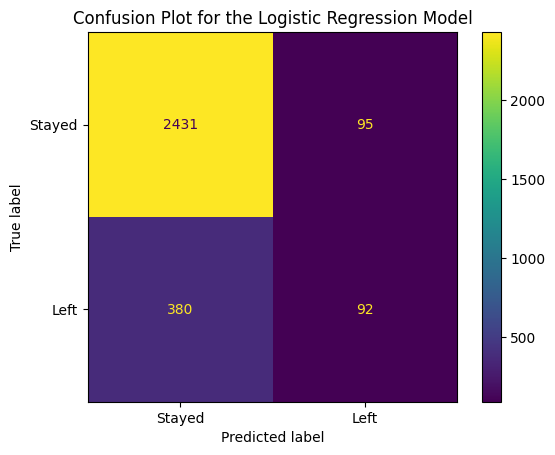

In [44]:
# Build the confusion matrix to compare predicted values against test values
plt_confusion_matrix("Logistic Regression Model", y_test, y_pred, clf)

In [45]:
# Print metrics for logistic regression model
result = result_metrics('Logistic Regression (unbalanced)', y_test, y_pred)
print(result)

                              Model        F1    Recall  Precision  Accuracy
0  Logistic Regression (unbalanced)  0.279211  0.194915   0.491979  0.841561


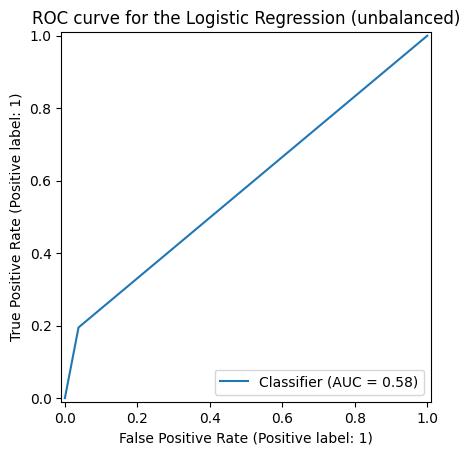

AUC score:  0.5786531932310748


In [46]:
# Plot ROC curve and view AUC score
show_RocCurve("Logistic Regression (unbalanced)", y_test, y_pred)

### Analysis of results

This is not a good result at all, as can be seen from the ROC curve and the AUC score. An AUC score of 0.5 indicates that the model is no better than a random guess, and 0.58 is not much better.

There are two issues - the data is not balanced, and there are not the required linear relationships between employee satisfaction levels and performance ratings against the outcome variable. 

The next step is to resample the data to create a better balance.

#### Perform upsampling to get a better distribution in the outcome variable

In [47]:
# Note: Upsampling is ONLY performed in the training data.
# The test data is left untouched.

# Merge x_train and y_train
# Assuming y_train is a pandas Series and you want to give it a column name
y_temp = pd.DataFrame(y_train, columns=['left_company'])

# Concatenate X_train and y_train along the columns (axis=1)
temp_data = pd.concat([X_train, y_temp], axis=1)
temp_data.head()

,satisfaction_level,performance_rating,project_number,average_monthly_hours,tenure,work_accident,recent_promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,left_company
6302,0.68,0.79,5,0.20,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4143,1.00,1.00,5,0.21,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8236,0.56,0.80,5,0.50,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
7936,0.51,0.71,4,0.52,3,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
8547,0.70,0.57,5,0.71,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
# Use resampling to create a balanced dataset
# Identify data points from majority and minority classes
data_majority = temp_data[temp_data["left_company"] == 0]
data_minority = temp_data[temp_data["left_company"] == 1]
print("data_majority: ", data_majority.shape)
print("data_minority: ", data_minority.shape)

# Upsample the minority class (which is left = 1)
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

print("data_minority_upsampled: ", data_minority_upsampled.shape)

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)
print("data_upsampled: ", data_upsampled.shape)

# Display new class counts
data_upsampled.head()

data_majority:  (7474, 21)
data_minority:  (1519, 21)
data_minority_upsampled:  (7474, 21)
data_upsampled:  (14948, 21)


,satisfaction_level,performance_rating,project_number,average_monthly_hours,tenure,work_accident,recent_promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,left_company
0,0.68,0.79,5,0.20,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1.00,1.00,5,0.21,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.56,0.80,5,0.50,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0.51,0.71,4,0.52,3,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.70,0.57,5,0.71,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Regenerate training dataset and rerun logistic regression


In [49]:
y_upsampled = data_upsampled['left_company']
X_upsampled = data_upsampled.drop(['left_company'], axis = 1)
clf = LogisticRegression().fit(X_upsampled, y_upsampled)
y_pred = clf.predict(X_test)

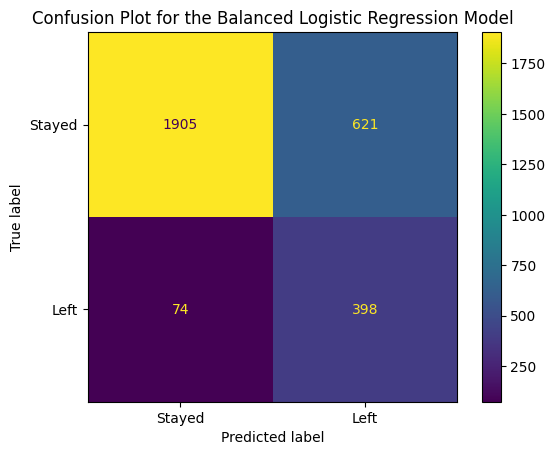

In [50]:
# Generate confusion matrix of balanced dataset
plt_confusion_matrix("Balanced Logistic Regression Model", y_test, y_pred, clf)

In [51]:
# Print metrics for balanced logistic regression model
result1 = result
result2 = result_metrics('Logistic Regression (balanced)', y_test, y_pred)
result = pd.concat([result, result2], axis=0)
result

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression (unbalanced),0.279211,0.194915,0.491979,0.841561
0,Logistic Regression (balanced),0.533870,0.843220,0.390579,0.768179


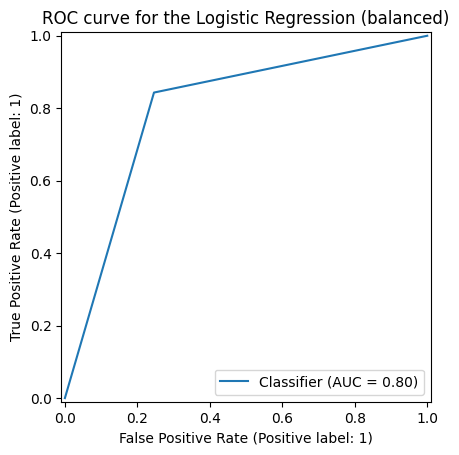

AUC score:  0.798688554289625


In [52]:
# Plot ROC curve and view AUC score
show_RocCurve("Logistic Regression (balanced)", y_test, y_pred)

### **Analysis of new results**

* This is better as can be seen from the ROC curve and AUC score. A score of 0.8 indicates the model is performing well. However, F1 = 0.5 and there is a significant imbalance between recall and precision (0.84 vs 0.39). The model is producing too many false positives (predicting someone when leave when he will not), thereby adding to the unfavourability of this model.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

One is predicting whether someone will remain in the company or leave, so this is a decision problem.

### Identify the types of models most appropriate for this task.

The logistic regression model does not produce great results. The next step is to run a random forest and a XGBoost model and compare the results.

### Modeling Approach

- Use all the parameters and see if there is underfitting or overfitting.
- Use an arbitrary set of model parameters to determine the optimal choice.
- It is more costly for the company if someone leaves, and therefore a false negative (predicting someone will stay but leaves) is worse than predicting a false positive. Therefore recall is the more important metric. 


### Generate the Random Forest model

In [53]:
# setup gridsearch for a random forest cvlassifier
rf = RandomForestClassifier(random_state=0)

cv_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, None],
    'min_samples_leaf' : [1, 2], 
    'min_samples_split' : [2, 3],
    'max_features' : ["sqrt"], 
    'max_samples' : [0.7]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')


In [54]:
%%time
# fit the model
rf_cv.fit(X_train, y_train)

CPU times: total: 45.8 s
Wall time: 51.1 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': ['sqrt'],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 200]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [55]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [56]:
rf_cv.best_score_

0.9038996004863644

In [57]:
# Generate predictions for the test data
rf_cv_pred = rf_cv.predict(X_test)

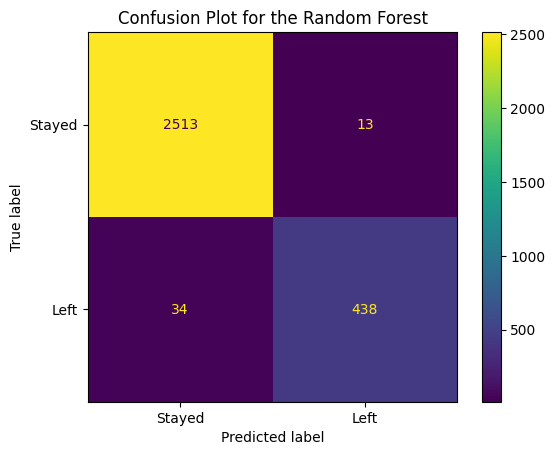

In [58]:
## Visualize the confusion matrix
plt_confusion_matrix("Random Forest", y_test, rf_cv_pred, rf_cv)

In [59]:
# Print metrics for the random forest model
result2 = result
result3 = result_metrics('Random Forest', y_test, rf_cv_pred)
result = pd.concat([result, result3], axis=0)
result

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression (unbalanced),0.279211,0.194915,0.491979,0.841561
0,Logistic Regression (balanced),0.533870,0.843220,0.390579,0.768179
0,Random Forest,0.949079,0.927966,0.971175,0.984323


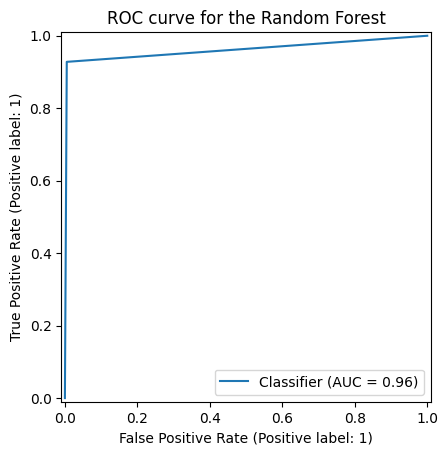

AUC score:  0.9614098125260008


In [60]:
# Plot ROC curve and list AUC score
show_RocCurve("Random Forest", y_test, rf_cv_pred)

<Figure size 1000x800 with 0 Axes>

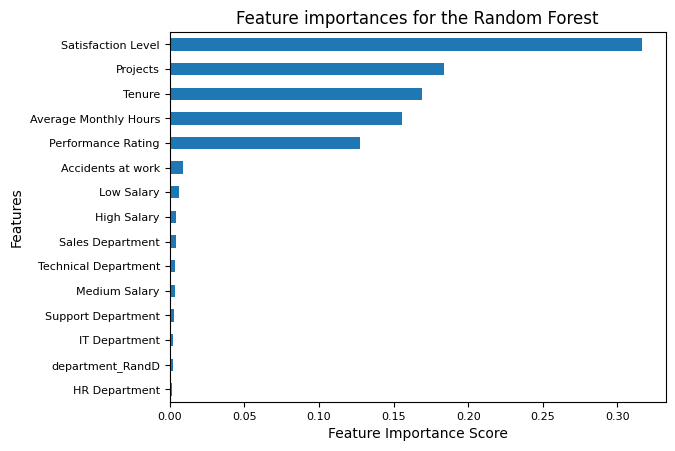

In [61]:
# Plot feature importances
show_feature_importance("Random Forest", rf_cv, X_train)

### Analysis of Random Forest Results

- The ROC curve looks good and an AOC score of 0.96 indicates a model that is giving a very good prediction.

- The F1 score is 0.949, recall is 0.92 and precision is 0.97. The model is predicting more false negatives (34) than false positives (13), which means it is tending to over-predict people leaving. This is preferable to the converse.

- The ratio of true negatives to true positives (2513 to 438) is 15%, which matches the ratio in the dataset.


### Generate the XGBoost model

In [62]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

cv_params = {'max_depth': [5,7], 
             'min_child_weight': [3,5],
             'learning_rate': [0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }    

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [63]:
%%time
# fit the model
xgb_cv.fit(X_train, y_train)

CPU times: total: 1min 42s
Wall time: 12.6 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.2, 0.3], 'max_depth': [5, 7],
                         'min_child_weight': [3, 5],
                         'n_estimators': [75, 100, 125]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [64]:
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 125}

In [65]:
xgb_cv.best_score_

0.912456574604829

In [66]:
# Generate predictions from test data
xgb_cv_pred = xgb_cv.predict(X_test)

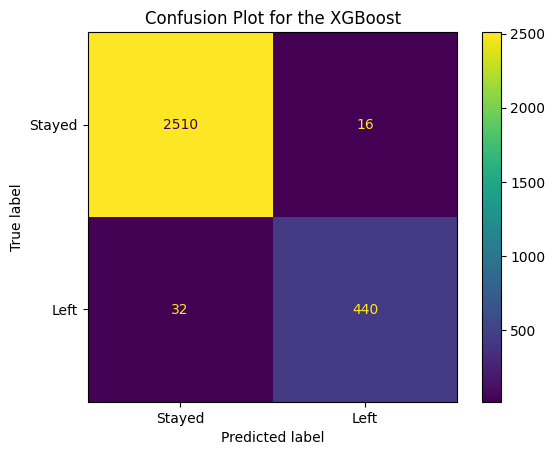

In [67]:
## Visualize the confusion matrix
plt_confusion_matrix("XGBoost", y_test, xgb_cv_pred, xgb_cv)

In [68]:
# Print metrics for the XGBoost model
result3 = result
result4 = result_metrics('XGBoost', y_test, xgb_cv_pred)
result = pd.concat([result, result4], axis=0)
result


,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression (unbalanced),0.279211,0.194915,0.491979,0.841561
0,Logistic Regression (balanced),0.533870,0.843220,0.390579,0.768179
0,Random Forest,0.949079,0.927966,0.971175,0.984323
0,XGBoost,0.948276,0.932203,0.964912,0.983989


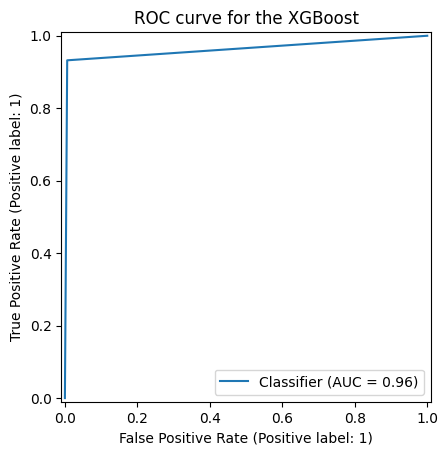

AUC score:  0.9629346323657689


In [69]:
# Plot ROC and show AUC score
show_RocCurve("XGBoost", y_test, xgb_cv_pred)


<Figure size 1000x800 with 0 Axes>

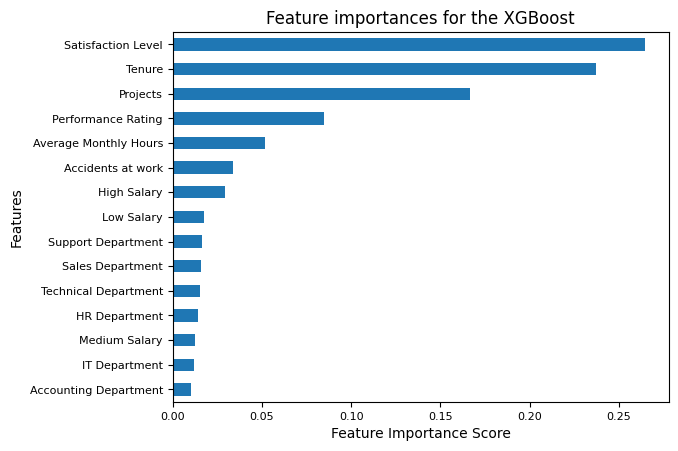

In [70]:
show_feature_importance("XGBoost", xgb_cv, X_train)

### Analysis of XGBoost Results

- The ROC curve looks good and an AOC score of 0.96 indicates a model that is giving a very good prediction. This score is the same as for the random forest.

- The F1 score is 0.948, recall is 0.932 and precision is 0.9764. The model, like the random forest model, is predicting more false negatives (32) than false positives (15), which means it is tending to over-predict people leaving. This is preferable to the converse.

- The ratio of true negatives to true positives (2510 to 440) is 15%, which matches the ratio in the dataset. The values in the confusion matrix are very similar to those of the random forest.

- It is strange though that accidents at work was identified as important. A graphic of this data contradicts this result.


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Key insights regarding building the models are as follows:

- Logistic regression does not handle an imbalanced dataset well, whereas Random Forest and XGBoost have not issues. Even after upsampling, the logistic regression model, though much improved, still did not perform that well.

- There is little difference between the random forest and the XGBoost models. Both performed very well and one can have confidence in their predictions. They will however err slightly in favor of predicting that someone will leave.

- The feature importance selected by both models is interesting. They both identified employee satisfaction levels as the most influential factor. The two subsequent important contributors are the number of projects the employee is given and his tenure. These were given different priorities by the two models, but were the next variables identified. The next two important factors are hours worked and performance rating - selected in a different sequence.

- The features to which the models gave priority are those identified from the analysis performed above.

### Recommendations to the business

The distribution of projects is a serious concern and needs to be further investigated, as does the matter of staff leaving who have good performance reviews. Staff typically leave after between 3 and 5 years. 

The analyis carried out leads to the following questions:

-  Are staff not being adequately rewarded for their hard work?
-  Why have so few staff been promoted? Promotions over the past five years amount to 1.7%.
-  Why is there such disparity between people who have excellent performance reviews? Are staff being correctly accessed?
-  Are staff not correctly skilled that some work such low hours, while others are overworked? One needs further information regarding project complexity to be able to fully understand project demands. The data suggests that being given the many projects requires long working hours. 

It was found that salary has little influence on attrition, as does the department in which staff work. An analysis shows that staff in all departments who are overworked leave. 

No information was provided as to why staff left, and whether the resignation was voluntary. There is also no information about when someone resigned. Is there any periodicity in the data? This could identify a management problem.

Information on project complexity is missing. Such information is necessary to provide a more holistic picture. It would also be interesting to look at the category of staff leaving. 